## MGSC 404 Final Group Project: Smart City Analytics - Bike Sharing Operations

5 December, 2022

Ah Ching, Tommy (260970179)

Chapdelaine, Kenitha (261051765)

Farrell, Cara-Li (261051787)

Yu, Elaine (261030551)

Presentation Slides: https://docs.google.com/presentation/d/1-mhirwiMQdedYahIySnp7XefYRVAFfdICr8nrvDwS7g/edit?usp=sharing

**Introduction**

With the need to improve their efficiency, quality and sustainability, many cities are shifting towards "smart cities" all over the world. Recently, Montreal has hopped on this trend has been implementing BIXI, their bike- sharing services.

However, there is a clear mismatch bewtween supply and demand at each station, meaning sometimes there aren't enough bikes available at a station for the number of customers who want to use the bikes. Therefore, to better manage their bike-sharing network in Montreal, BIXI's board of directors has hired our team to address this challenge and improve BIXI at the operational level. 

In order to do so, they have provided the bike-sharing data of Divvy in Chicago, which has rather similar operations to BIXI, since BIXI does not have enough data yet. We have 3 datatsets for 2017: one for an overview of the bike stations and locations (station_id), one for Quarter 3 (Q3), one for Quarter 4 (Q4).

The purpose of our report is to inform BIXI how to optimally move their bikes in order to miniimize their costs.

**Approach Overview**

To tackle this problem, we first started with a preliminary analysis of both datasets to gain a better understanding of the bike-sharing market. This analysis then allowed us to draw informed assumptions and conclusions about our datasets in order to formulate a Linear Model that would optimize BIXI's overall costs.

This report contains 3 main sections:
1.   Exploring the Data
2.   Formulating and Solving our Model
3.   Model Analysis and Managerial Insights


# Importing the data

In [1]:
import pandas as pd
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Exploring the Data 

We first started by loading the original data provided by BIXI on Divvy's bike-sharing operations in Chicago, whcih consists of Q3, Q4, and station_id.

As we can observe, there are 575 observations in the station_id table, 1,608,260 observation in Q3, and 669,229 observations in Q4. There is lots to work with!

In [2]:
station_id = Table.read_table("Divvy_Stations_2017_Q3Q4.csv")
station_id

id   | name                        | city    | latitude | longitude | dpcapacity | online_date     | Unnamed: 7
2    | Buckingham Fountain         | Chicago | 41.8764  | -87.6203  | 27         | 6/10/2013 10:43 | nan
3    | Shedd Aquarium              | Chicago | 41.8672  | -87.6154  | 55         | 6/10/2013 10:44 | nan
4    | Burnham Harbor              | Chicago | 41.8563  | -87.6133  | 23         | 6/10/2013 10:46 | nan
5    | State St & Harrison St      | Chicago | 41.8741  | -87.6277  | 23         | 6/10/2013 10:46 | nan
6    | Dusable Harbor              | Chicago | 41.885   | -87.6128  | 39         | 6/10/2013 11:18 | nan
7    | Field Blvd & South Water St | Chicago | 41.8863  | -87.6175  | 19         | 6/19/2013 10:00 | nan
9    | Leavitt St & Archer Ave     | Chicago | 41.8288  | -87.6806  | 19         | 6/21/2013 9:33  | nan
11   | Jeffery Blvd & 71st St      | Chicago | 41.7666  | -87.5765  | 11         | 6/21/2013 9:39  | nan
12   | South Shore Dr & 71st St    | Chicago | 41.7664  | -87.5657  | 15         | 6/21/2013 10:00 | nan
13   | Wilton Ave & Diversey Pkwy  | Chicago | 41.9324  | -87.6527  | 27         | 6/22/2013 18:29 | nan
... (575 rows omitted)

In [3]:
Q3 = Table.read_table("Divvy_Trips_2017_Q3.csv")
Q3

trip_id  | start_time         | end_time           | bikeid | tripduration | from_station_id | from_station_name            | to_station_id | to_station_name                 | usertype   | gender | birthyear
16734065 | 9/30/2017 23:59:58 | 10/1/2017 00:05:47 | 1411   | 349          | 216             | California Ave & Division St | 259           | California Ave & Francis Pl     | Subscriber | Male   | 1985
16734064 | 9/30/2017 23:59:53 | 10/1/2017 00:05:47 | 3048   | 354          | 216             | California Ave & Division St | 259           | California Ave & Francis Pl     | Subscriber | Male   | 1979
16734063 | 9/30/2017 23:59:06 | 10/1/2017 00:02:52 | 2590   | 226          | 141             | Clark St & Lincoln Ave       | 144           | Larrabee St & Webster Ave       | Subscriber | Male   | 1993
16734062 | 9/30/2017 23:58:56 | 10/1/2017 00:07:37 | 551    | 521          | 96              | Desplaines St & Randolph St  | 217           | Racine Ave (May St) & Fulton St | Customer   | nan    | nan
16734061 | 9/30/2017 23:58:47 | 10/1/2017 00:07:37 | 1287   | 530          | 96              | Desplaines St & Randolph St  | 217           | Racine Ave (May St) & Fulton St | Subscriber | Female | 1994
16734060 | 9/30/2017 23:58:45 | 10/1/2017 00:16:37 | 6132   | 1072         | 478             | Rockwell St & Eastwood Ave   | 117           | Wilton Ave & Belmont Ave        | Subscriber | Male   | 1980
16734059 | 9/30/2017 23:57:19 | 10/1/2017 00:05:36 | 5235   | 497          | 114             | Sheffield Ave & Waveland Ave | 296           | Broadway & Belmont Ave          | Subscriber | Male   | 1988
16734058 | 9/30/2017 23:57:12 | 10/1/2017 00:00:46 | 54     | 214          | 87              | Racine Ave & Fullerton Ave   | 127           | Lincoln Ave & Fullerton Ave     | Subscriber | Male   | 1977
16734057 | 9/30/2017 23:56:59 | 10/1/2017 00:20:17 | 3823   | 1398         | 90              | Millennium Park              | 86            | Eckhart Park                    | Customer   | nan    | nan
16734056 | 9/30/2017 23:56:52 | 10/1/2017 00:14:44 | 5794   | 1072         | 296             | Broadway & Belmont Ave       | 268           | Lake Shore Dr & North Blvd      | Subscriber | Female | 1990
... (1608260 rows omitted)

In [4]:
Q4 = Table.read_table("Divvy_Trips_2017_Q4.csv")
Q4

trip_id  | start_time       | end_time         | bikeid | tripduration | from_station_id | from_station_name                   | to_station_id | to_station_name                     | usertype   | gender | birthyear
17536701 | 12/31/2017 23:58 | 1/1/2018 0:03    | 3304   | 284          | 159             | Claremont Ave & Hirsch St           | 69            | Damen Ave & Pierce Ave              | Subscriber | Male   | 1988
17536700 | 12/31/2017 23:54 | 1/1/2018 0:18    | 5975   | 1402         | 145             | Mies van der Rohe Way & Chestnut St | 145           | Mies van der Rohe Way & Chestnut St | Customer   | nan    | nan
17536699 | 12/31/2017 23:54 | 1/1/2018 0:18    | 4906   | 1441         | 145             | Mies van der Rohe Way & Chestnut St | 145           | Mies van der Rohe Way & Chestnut St | Customer   | nan    | nan
17536698 | 12/31/2017 23:48 | 12/31/2017 23:53 | 5667   | 315          | 340             | Clark St & Wrightwood Ave           | 143           | Sedgwick St & Webster Ave           | Subscriber | Male   | 1963
17536697 | 12/31/2017 23:42 | 12/31/2017 23:47 | 5353   | 272          | 240             | Sheridan Rd & Irving Park Rd        | 245           | Clarendon Ave & Junior Ter          | Subscriber | Male   | 1977
17536696 | 12/31/2017 23:41 | 12/31/2017 23:51 | 5840   | 589          | 93              | Sheffield Ave & Willow St           | 343           | Racine Ave & Wrightwood Ave         | Subscriber | Male   | 1988
17536695 | 12/31/2017 23:34 | 12/31/2017 23:39 | 6351   | 301          | 337             | Clark St & Chicago Ave              | 182           | Wells St & Elm St                   | Subscriber | Male   | 1990
17536694 | 12/31/2017 23:21 | 12/31/2017 23:23 | 2562   | 141          | 226             | Racine Ave & Belmont Ave            | 117           | Wilton Ave & Belmont Ave            | Subscriber | Male   | 1987
17536693 | 12/31/2017 23:17 | 12/31/2017 23:27 | 2471   | 615          | 49              | Dearborn St & Monroe St             | 26            | McClurg Ct & Illinois St            | Subscriber | Male   | 1981
17536692 | 12/31/2017 22:57 | 12/31/2017 23:09 | 6462   | 743          | 196             | Cityfront Plaza Dr & Pioneer Ct     | 255           | Indiana Ave & Roosevelt Rd          | Subscriber | Male   | 1980
... (669229 rows omitted)

## Data Analysis

Basic Statistics 

We first started by examining exploratory statistics in order to understand our data and the bike-sharing marketing to see how dispersed it is for both datasets. We can observe that the average trip duration for riders is longer in Q3 than in Q4, with a difference of ~4.414 mins. 

Average duration (minutes):

In [5]:
# for Q3
mean_Q3 = Q3.column("tripduration").mean()
mean_Q3 = mean_Q3/60
print("The average duration for Q3 is " + str(mean_Q3) + " minutes")

# for Q4
mean_Q4 = Q4.column("tripduration").mean()
mean_Q4 = mean_Q4/60
print("The average duration for Q4 is " + str(mean_Q4) + " minutes")

The average duration for Q3 is 17.4041417797 minutes
The average duration for Q4 is 12.9906749806 minutes


Standard deviation (minutes):

We can observe that the data is slightly more dispersed in Q3 than in Q4, as its standard deviation is approximately 5.127 min larger.

In [6]:
# for Q3
std_Q3 = Q3.column("tripduration").std()
std_Q3 = std_Q3/60
print("Standard deviation for Q3 is " + str(std_Q3) + " minutes")

# for Q4
std_Q4 = Q4.column("tripduration").std()
std_Q4 = std_Q4/60
print("Standard deviation for Q4 is " + str(std_Q4) + " minutes")

Standard deviation for Q3 is 26.913958845 minutes
Standard deviation for Q4 is 21.7872201456 minutes


Durations (minutes): 

We evaluated the longest and shortest trip durations in both datasets. In both cases, we observe extreme outliers. 

The short trip durations of 1 minute could be explained by users taking the bike out from the Bixi stand and putting it back in a minute later. Perhaps to change bikes or simply decided to not take the bike.

The longer distances of approximately 1,400 minutes (also 23 hours) can maybe be explained by the user not returning the bike. We know that Bixi users are restricted to a certain amount of riding time and must return the bike to the nearest stand within that given period. 

Both for Q3 and Q4 the durations for shortest and longest trip are quite comparable. 

In [7]:
# Durations for Q3
# Shortest duration (minutes)
min_Q3 = Q3.column("tripduration").min()
min_Q3 = min_Q3/60
print("Shortest duration for Q3 is of " + str(min_Q3) + " minutes")

# Longest duration (minutes)
max_Q3 = Q3.column("tripduration").max()
max_Q3 = max_Q3/60
print("Longest duration for Q3 is of " + str(max_Q3) + " minutes")

Shortest duration for Q3 is of 1.0 minutes
Longest duration for Q3 is of 1433.56666667 minutes


In [8]:
# Durations for Q4
# Shortest duration (minutes)
min_Q4 = Q4.column("tripduration").min()
min_Q4 = min_Q4/60
print("Shortest duration for Q4 is of " + str(min_Q4) + " minutes")
# Longest duration (minutes)
max_Q4 = Q4.column("tripduration").max()
max_Q4 = max_Q4/60
print("Longest duration for Q4 is of " + str(max_Q4) + " minutes")

Shortest duration for Q4 is of 1.0 minutes
Longest duration for Q4 is of 1424.43333333 minutes


Median (minutes):

The comparison of Q3 and Q4's median is down below. For Q3 the median time is 12.73 mins whereas Q4's median is lower at 9.45 mins. 

This is to give us an idea of where the center value is for both datasets and in order to better visualize this, we have plotted a histogram for Q3 which seems to be right-skewed. Most trips tend to be a few minutes (i.e. 12.73 minutes) rather than hours.

In [9]:
# Median for Q3
median_Q3 = np.median(Q3.column("tripduration"))
median_Q3 = median_Q3/60
print("The median of the trip duration for Q3 is " + str(median_Q3) + " minutes")

# Median for Q4
median_Q4 = np.median(Q4.column("tripduration"))
median_Q4 = median_Q4/60
print("The median of the trip duration for Q4 is " + str(median_Q4) + " minutes")

The median of the trip duration for Q3 is 12.7333333333 minutes
The median of the trip duration for Q4 is 9.45 minutes


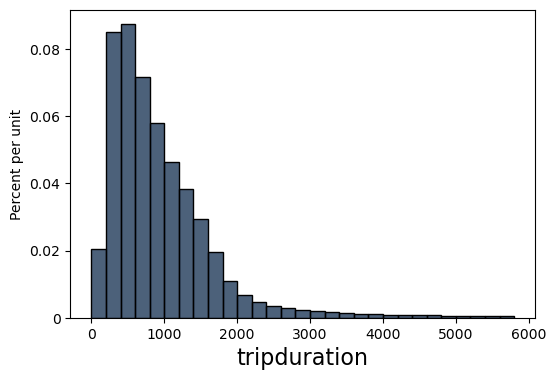

In [10]:
Q3.hist('tripduration', bins = np.arange(0,6000,200))

Most Popular Trips: 

By doing a count of the trips for both quarters, we can see the most popular trips taken by users. Trips shows the station ID number of the starting station followed by ':' end station, which shows us the route taken.  

The data is presented as a table and as a horizontal bar graph to visualize the results. 

We can see station ID 35 is very popular, often being the start or end station for most of the dataset. 

This is done for both Q3 and Q4, but the results are quite similar. For instance the most popular station stays 76:35.

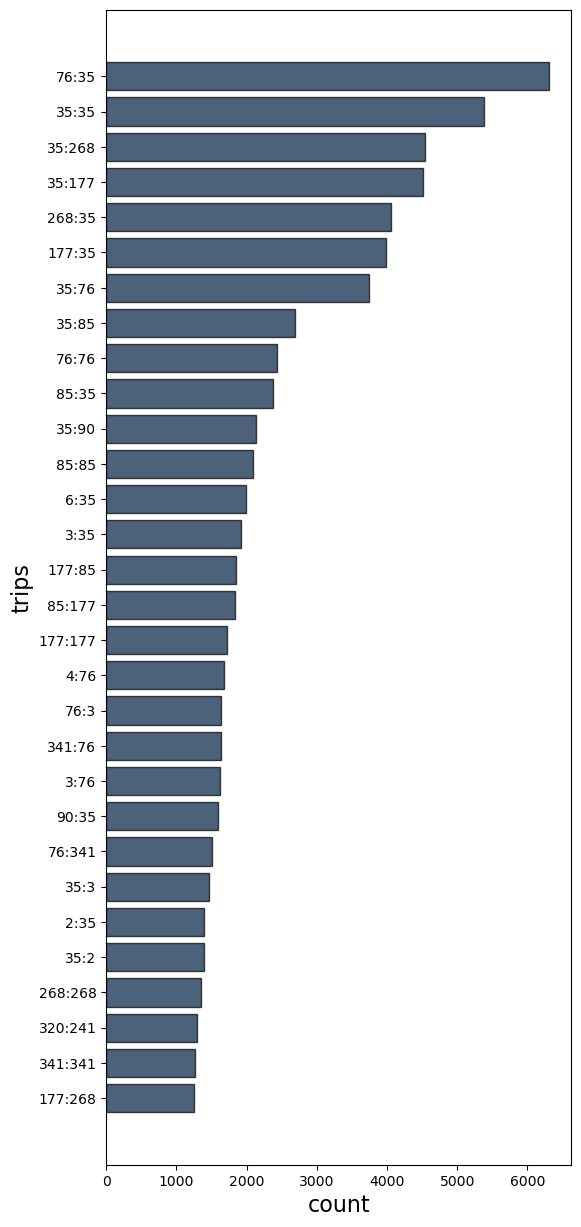

In [11]:
# For Q3
trips = Table().with_column('from_station', Q3.column('from_station_id')).with_column('to_station', Q3.column('to_station_id'))
tripping = []
for n in range(len(trips.column('from_station'))):
    x = str(trips.column('from_station')[n]) + ':' + str(trips.column('to_station')[n])
    tripping.append(x)
    
L = Table().with_column('trips', tripping)
Most_popular_trips = L.group('trips').sort('count', descending = True)
bar = Most_popular_trips.take[:30]
bar.show()
bar.barh('trips')

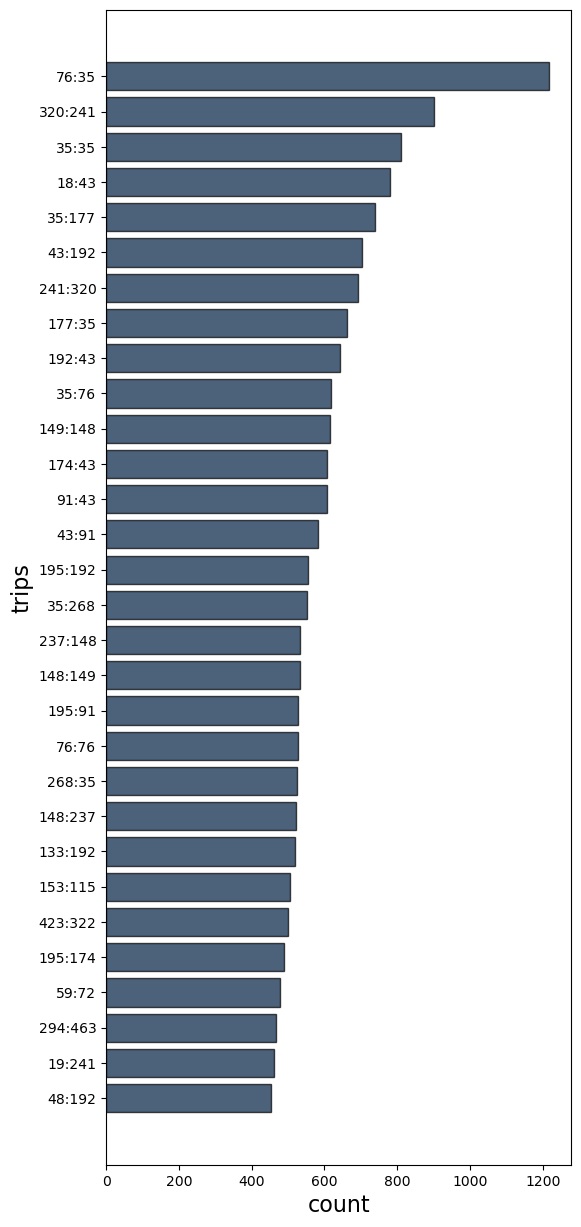

In [12]:
# For Q4 
trips2 = Table().with_column('from_station', Q4.column('from_station_id')).with_column('to_station', Q4.column('to_station_id'))
tripping = []
for n in range(len(trips2.column('from_station'))):
    x = str(trips2.column('from_station')[n]) + ':' + str(trips2.column('to_station')[n])
    tripping.append(x)
L2 = Table().with_column('trips', tripping)
Most_popular_trips2 = L2.group('trips').sort('count', descending = True)
bar2 = Most_popular_trips2.take[:30]
bar2.show()
bar2.barh('trips')

Popular Station ID: 

We wanted to find the most popular stations, so we did a count to find the most used stations. 
Similar to above, the most popular stations are 35, 76 and 268 for Q3.

In [13]:
# for Q3
popular_id = Q3.group('from_station_id').sort('count', descending = True)
popular_id

from_station_id | count
35              | 52110
76              | 26507
268             | 26342
177             | 26251
85              | 20673
192             | 20231
91              | 17171
90              | 16260
77              | 15967
3               | 15864
... (559 rows omitted)

Most Popular Start Time: 

To find the peak times, we performed a count on start hours and end hours. 

The data shows most popular start hours are 8-9AM and around 4-5PM. These 8-9AM peak hours could potentially be explained by the fact that users are leaving from their homes to go to school or to work whereas at 4-5PM, they are ending their day and are going back home. 

We have plotted histograms in order to better visualioze these peak times. 

In [14]:
# for Q3
# Extract time 

list = []
for i in np.arange(0,1608270):
    s = Q3.column('start_time')[i]
    list.append(int(s.split(' ')[1][0:2])) 
tripQ3 = Q3.with_column('start_hour', list)
tripQ3

# Popular Start Time for Q3
popular_start = tripQ3.group('start_hour').sort('count', descending = True)
popular_start

start_hour | count
17         | 184966
16         | 147050
18         | 135483
15         | 107830
8          | 106639
13         | 99819
14         | 99214
12         | 99149
19         | 92911
11         | 86946
... (14 rows omitted)

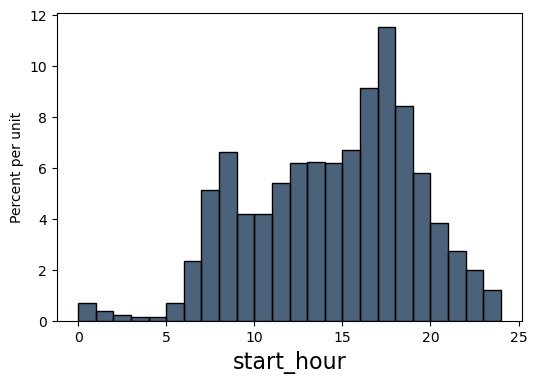

In [15]:
# Plot of Popular Start Time for Q3
tripQ3.hist('start_hour', bins = np.arange(0,25,1))

In [16]:
# for Q4
# Extract time 

list = []
for i in np.arange(0,669239):
    s = Q4.column('start_time')[i]
    list.append(int(s.split(' ')[1][0:-3]))

tripQ4 = Q4.with_column('start_hour', list)
tripQ4

# Popular Start Time for Q4
popular_hours_Q4 = tripQ4.group('start_hour').sort('count', descending = True)
popular_hours_Q4 

start_hour | count
17         | 81150
16         | 65375
8          | 62849
18         | 49800
7          | 48298
15         | 43712
14         | 36828
13         | 36409
12         | 36081
9          | 32319
... (14 rows omitted)

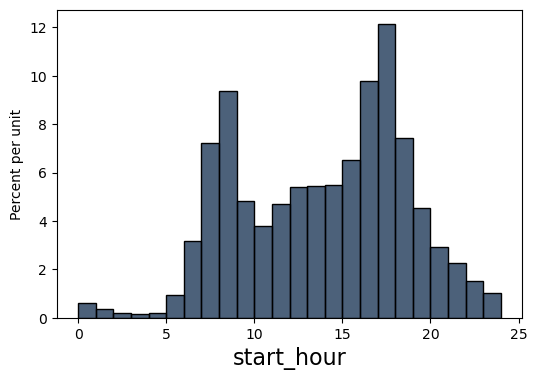

In [17]:
# Plot of Popular Start Time for Q4
tripQ4.hist('start_hour', bins = np.arange(0,25,1))

Most Popular End Time:

Most popular end time uses the same idea as start time above. 

Histograms show the same results as above, where peak hours are the most popular. 

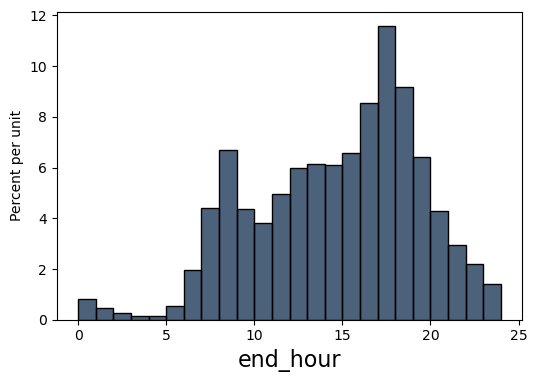

In [18]:
# for Q3
list = []
for i in np.arange(0,1608270):
    s = Q3.column('end_time')[i]
    list.append(int(s.split(' ')[1][0:2])) 

Q3 = Q3.with_column('end_hour', list)

popular_end_Q3 = Q3.group('end_hour').sort('count', descending = True)
popular_end_Q3 

Q3.hist('end_hour', bins = np.arange(0,25,1))

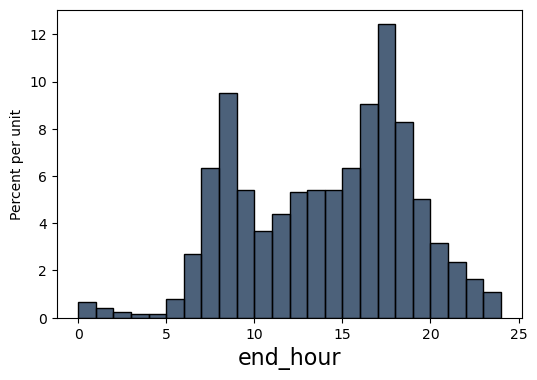

In [19]:
# for Q4
list = []
for i in np.arange(0,669239):
    s = Q4.column('end_time')[i]
    list.append(int(s.split(' ')[1][0:-3])) 

Q4 = Q4.with_column('end_hour', list)

popular_end_Q4 = Q4.group('end_hour').sort('count', descending = True)
popular_end_Q4 

Q4.hist('end_hour', bins = np.arange(0,25,1))

Most Used Station Location:

Similar as most popular stations, we wanted to see the names of the stations/locations. We can see station 35 is Streeter Dr & Grand Ave, which is still the most popular location followed by Lake Shore Dr & Monroe St and Lake Shore Dr & North Blvd. (Q3)

For Q4, there are slight differences, with the most popular stations being Canal St & Adams St and Clinton St & Washington Blvd. 

The horizontal bar graph shows the popular station names. 

In [20]:
# for Q3
pop_location_Q3 = tripQ3.group("from_station_name").sort("count", descending = True)
pop_location_Q3.show(5)

In [21]:
# for Q4
pop_location_Q4 = tripQ4.group("from_station_name").sort("count", descending = True)
pop_location_Q4

from_station_name            | count
Canal St & Adams St          | 12575
Clinton St & Washington Blvd | 10232
Clinton St & Madison St      | 9443
Streeter Dr & Grand Ave      | 8775
Kingsbury St & Kinzie St     | 7492
Franklin St & Monroe St      | 7344
Columbus Dr & Randolph St    | 7235
Canal St & Madison St        | 7066
Michigan Ave & Washington St | 6588
Daley Center Plaza           | 6033
... (557 rows omitted)

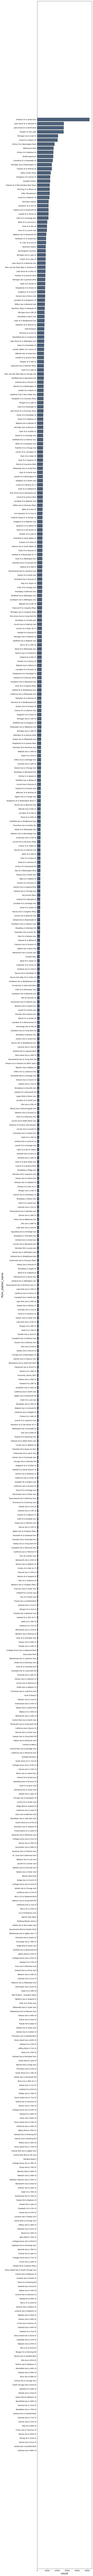

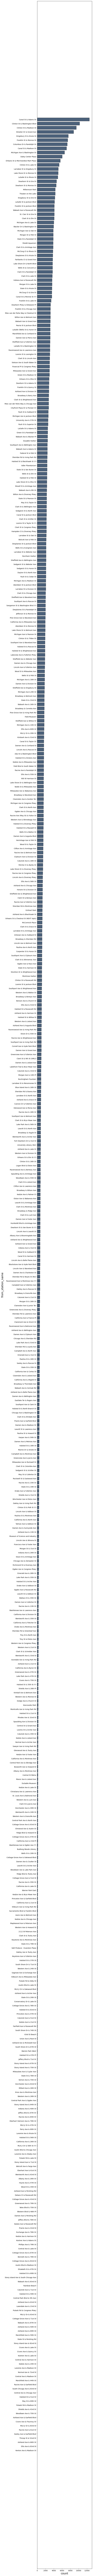

In [22]:
#Visualization of most used bikes by location for Q3 and Q4
from_stationQ3 = pop_location_Q3.barh('from_station_name')
from_stationQ4 = pop_location_Q4.barh('from_station_name')

Most Popular "To" Station:

We used a count on to/from station ID to see the most popular station IDs for Q3 and Q4, presented in the tables below. 

For both datasets, we have found that station 192 is the most popular to/from station, with slight differences in the following stations between Q3 and Q4.

In [23]:
# for Q3
Q3.group("to_station_id").sort("count", descending = True)

# for Q4
Q4.group("to_station_id").sort("count", descending = True)

to_station_id | count
192           | 14554
77            | 12131
35            | 9855
91            | 9738
43            | 7394
133           | 7323
81            | 6990
174           | 6803
287           | 5705
100           | 5596
... (557 rows omitted)

Most Popular "From" Station:

In [24]:
# for Q3

Q3.group("from_station_id").sort("count", descending = True)

# for Q4

Q4.group("from_station_id").sort("count", descending = True)

from_station_id | count
192             | 12575
91              | 10232
77              | 9443
35              | 8775
133             | 7492
287             | 7344
195             | 7235
174             | 7066
43              | 6588
81              | 6033
... (557 rows omitted)

Total Capacity: 

The total capacity of stations is equal to 10,216 bikes.

In [25]:
total = station_id['dpcapacity'].sum()
total

10216

Total Number of Bikes: 

There are a total of 5737 bikes available for Q3. 

In [26]:
total_bikes = tripQ3.group('bikeid')
total_bikes

# We can see that there are 5727 bikes in the system for Q3

bikeid | count
1      | 352
2      | 129
3      | 191
4      | 249
5      | 176
6      | 278
7      | 226
8      | 122
9      | 305
10     | 317
... (5727 rows omitted)

Breakdown by Gender: 

The pie charts below show Bixi users are mainly male. In both cases, results for each quarter stayed the same where male represents around 70% of users.

This demographic analysis is to better understand the bike-sharing market, which can help BIXI with the strategic side of its business.

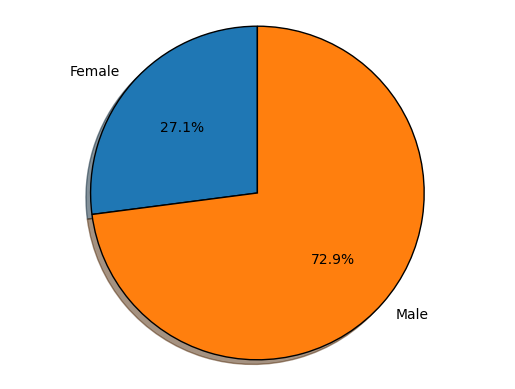

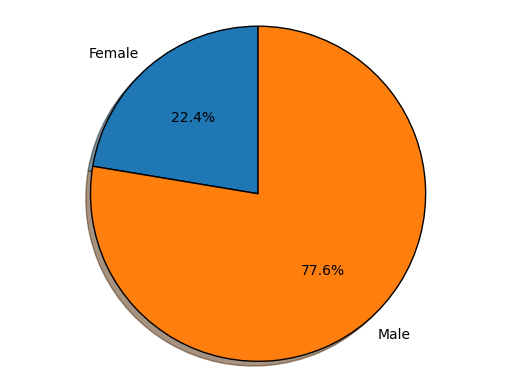

In [27]:
by_genderQ3 = Q3.group('gender')
by_genderQ4 = Q4.group('gender')

# Pie chart for Q3
labels = 'Female', 'Male'
sizes = [315702, 851188]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Pie chart for Q4
labels = 'Female', 'Male'
sizes = [132151, 458508]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Breakdown by User Types: 

Most users are subscribers representing over 70% of the data as seen in the pie charts below. 

This can inform BIXI that most of their revenue can be generated through loyal customers (subscribers).

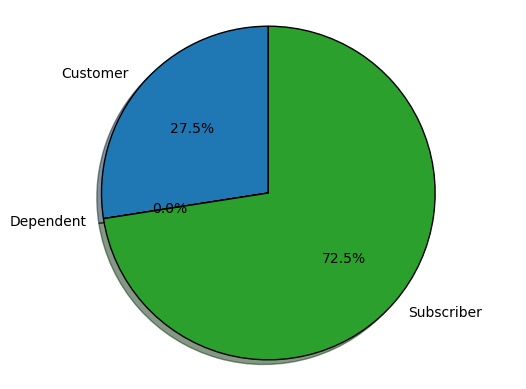

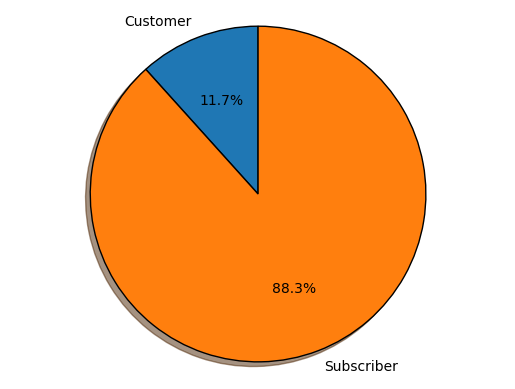

In [28]:
# Pie chart for Q3
by_usertypeQ3 = Q3.group('usertype')

labels = 'Customer', 'Dependent', 'Subscriber'
sizes = [441623, 3, 1166644]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

# Pie chart for Q4
by_usertypeQ4 = Q4.group('usertype')

labels = 'Customer', 'Subscriber'
sizes = [78087, 591152]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Average Trips Each Day: 

We calculated the average amount of trips per day for both quarters. 

For Q3, the average amount of trips is much higher, at around 17,481 trips per day. 

For Q4, the average amount of trips is of 7,274, which is significantly less than Q3. 

In [29]:
# for Q3
#split date
listdate = []
for i in np.arange(0,1608270):
    s = Q3.column('start_time')[i]
    listdate.append((s.split(' ')[0])) 
Q3 = Q3.with_column('start_date',listdate)
Q3

Q3_trips_per_day = Q3.group("start_date")
Q3_trips_per_day

print('The average amount of trips per day is of ', np.mean(Q3_trips_per_day.column("count")),'for Q3')

# for Q4
listdate = []
for i in np.arange(0,669239):
    s = Q4.column('start_time')[i]
    listdate.append((s.split(' ')[0])) 
Q4 = Q4.with_column('start_date',listdate)
Q4

Q4_trips_per_day = Q4.group("start_date")
Q4_trips_per_day

print('The average amount of trips per day is of ', np.mean(Q4_trips_per_day.column("count")), 'for Q4')

The average amount of trips per day is of  17481.1956522 for Q3
The average amount of trips per day is of  7274.33695652 for Q4


Breakdown per Age: 

We wanted to see the user ages for Q3 and Q4. Using the birthyears, we can see the most popular age is around 25 years old. For both quarters, a histogram is represented to show the most popular ages. 

In [30]:
# for Q3
Q3['age'] = 2017 - Q3['birthyear']
Q3

trip_id  | start_time         | end_time           | bikeid | tripduration | from_station_id | from_station_name            | to_station_id | to_station_name                 | usertype   | gender | birthyear | end_hour | start_date | age
16734065 | 9/30/2017 23:59:58 | 10/1/2017 00:05:47 | 1411   | 349          | 216             | California Ave & Division St | 259           | California Ave & Francis Pl     | Subscriber | Male   | 1985      | 0        | 9/30/2017  | 32
16734064 | 9/30/2017 23:59:53 | 10/1/2017 00:05:47 | 3048   | 354          | 216             | California Ave & Division St | 259           | California Ave & Francis Pl     | Subscriber | Male   | 1979      | 0        | 9/30/2017  | 38
16734063 | 9/30/2017 23:59:06 | 10/1/2017 00:02:52 | 2590   | 226          | 141             | Clark St & Lincoln Ave       | 144           | Larrabee St & Webster Ave       | Subscriber | Male   | 1993      | 0        | 9/30/2017  | 24
16734062 | 9/30/2017 23:58:56 | 10/1/2017 00:07:37 | 551    | 521          | 96              | Desplaines St & Randolph St  | 217           | Racine Ave (May St) & Fulton St | Customer   | nan    | nan       | 0        | 9/30/2017  | nan
16734061 | 9/30/2017 23:58:47 | 10/1/2017 00:07:37 | 1287   | 530          | 96              | Desplaines St & Randolph St  | 217           | Racine Ave (May St) & Fulton St | Subscriber | Female | 1994      | 0        | 9/30/2017  | 23
16734060 | 9/30/2017 23:58:45 | 10/1/2017 00:16:37 | 6132   | 1072         | 478             | Rockwell St & Eastwood Ave   | 117           | Wilton Ave & Belmont Ave        | Subscriber | Male   | 1980      | 0        | 9/30/2017  | 37
16734059 | 9/30/2017 23:57:19 | 10/1/2017 00:05:36 | 5235   | 497          | 114             | Sheffield Ave & Waveland Ave | 296           | Broadway & Belmont Ave          | Subscriber | Male   | 1988      | 0        | 9/30/2017  | 29
16734058 | 9/30/2017 23:57:12 | 10/1/2017 00:00:46 | 54     | 214          | 87              | Racine Ave & Fullerton Ave   | 127           | Lincoln Ave & Fullerton Ave     | Subscriber | Male   | 1977      | 0        | 9/30/2017  | 40
16734057 | 9/30/2017 23:56:59 | 10/1/2017 00:20:17 | 3823   | 1398         | 90              | Millennium Park              | 86            | Eckhart Park                    | Customer   | nan    | nan       | 0        | 9/30/2017  | nan
16734056 | 9/30/2017 23:56:52 | 10/1/2017 00:14:44 | 5794   | 1072         | 296             | Broadway & Belmont Ave       | 268           | Lake Shore Dr & North Blvd      | Subscriber | Female | 1990      | 0        | 9/30/2017  | 27
... (1608260 rows omitted)

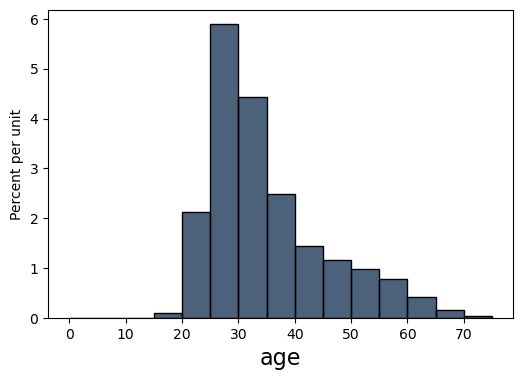

In [31]:
Q3.hist('age', bins = np.arange(0,80,5))

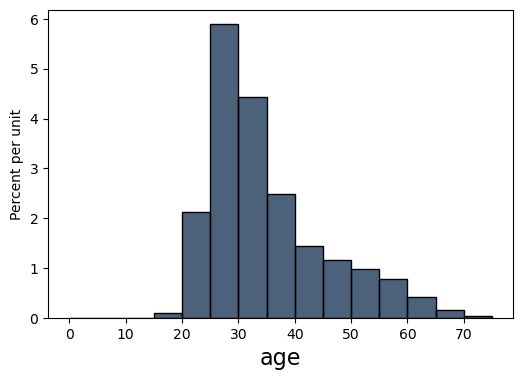

In [32]:
# for Q3
Q4['age'] = 2017 - Q4['birthyear']
Q4
Q3.hist('age', bins = np.arange(0,80,5))

Maps: 

For a more visual representation of the stations. We included an interactive map showing the locations of every station. This allows us to see where most of the stations are located, which is mainly in the city center and they disperse as we go more outside of the city. 

In [33]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [34]:
import folium

In [35]:
map_stations = folium.Map([41.8764, -87.6203], zoom_start=9, tiles='openstreetmap' )

# common layer types: 'openstreetmap', 'stamenterrain', 'stamenterrain', 'stamenwatercolor'

for lat, lon, name, dockcount in zip(station_id.column('latitude'), station_id.column('longitude'), station_id.column('name'), station_id.column('dpcapacity')):
    folium.Marker(
        [lat, lon],
        popup = name,
        ).add_to(map_stations)
map_stations


Distances: 

With the help of Geopy, we calculated the distances between each station. We first created tables with the appropriate information, with the proper latitude/longitude of the respective stations. Then using Geopy we obtain the distances for each station in km. This will allow us to implement our optimization problem. 

In [36]:
bar

trips  | count
76:35  | 6307
35:35  | 5379
35:268 | 4540
35:177 | 4508
268:35 | 4053
177:35 | 3981
35:76  | 3749
35:85  | 2692
76:76  | 2435
85:35  | 2381
... (20 rows omitted)

In [37]:
listorigin = []
for i in np.arange(0,30):
    s = bar.column('trips')[i]
    listorigin.append((s.split(':')[0])) 
listdest = []
for i in np.arange(0,30):
    s = bar.column('trips')[i]
    listdest.append((s.split(':')[1])) 
    
bar = bar.with_columns("origin", listorigin)
bar = bar.with_columns("destination", listdest)
bar

trips  | count | origin | destination
76:35  | 6307  | 76     | 35
35:35  | 5379  | 35     | 35
35:268 | 4540  | 35     | 268
35:177 | 4508  | 35     | 177
268:35 | 4053  | 268    | 35
177:35 | 3981  | 177    | 35
35:76  | 3749  | 35     | 76
35:85  | 2692  | 35     | 85
76:76  | 2435  | 76     | 76
85:35  | 2381  | 85     | 35
... (20 rows omitted)

In [38]:
# Combining tables
latitude_origin = []
longitude_origin = []
for i in np.arange(0,30,1):
    for j in range(len(station_id.column('id'))):
        if int(bar.column('origin')[i]) == int(station_id.column('id')[j]):
            latitude_origin.append(station_id.column('latitude')[j])
            longitude_origin.append(station_id.column('longitude')[j])
bar = bar.with_columns('latitude origin', latitude_origin)
bar = bar.with_columns('longitude origin', longitude_origin)

latitude_dest = []
longitude_dest = []
for i in np.arange(0,30,1):
    for j in range(len(station_id.column('id'))):
        if int(bar.column('destination')[i]) == int(station_id.column('id')[j]):
            latitude_dest.append(station_id.column('latitude')[j])
            longitude_dest.append(station_id.column('longitude')[j])
bar = bar.with_columns('latitude destination', latitude_dest)
bar = bar.with_columns('longitude destination', longitude_dest)
bar


trips  | count | origin | destination | latitude origin | longitude origin | latitude destination | longitude destination
76:35  | 6307  | 76     | 35          | 41.881          | -87.6167         | 41.8923              | -87.612
35:35  | 5379  | 35     | 35          | 41.8923         | -87.612          | 41.8923              | -87.612
35:268 | 4540  | 35     | 268         | 41.8923         | -87.612          | 41.9117              | -87.6268
35:177 | 4508  | 35     | 177         | 41.8923         | -87.612          | 41.9263              | -87.6308
268:35 | 4053  | 268    | 35          | 41.9117         | -87.6268         | 41.8923              | -87.612
177:35 | 3981  | 177    | 35          | 41.9263         | -87.6308         | 41.8923              | -87.612
35:76  | 3749  | 35     | 76          | 41.8923         | -87.612          | 41.881               | -87.6167
35:85  | 2692  | 35     | 85          | 41.8923         | -87.612          | 41.901               | -87.6238
76:76  | 2435  | 76     | 76          | 41.881          | -87.6167         | 41.881               | -87.6167
85:35  | 2381  | 85     | 35          | 41.901          | -87.6238         | 41.8923              | -87.612
... (20 rows omitted)

In [39]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [40]:
import geopy.distance
distance = []
for i in np.arange(0,30,1):
    # origin
    coord_1 = bar.column('latitude origin')[i]
    coord_2 = bar.column('longitude origin')[i]
    coords_origin = coord_1, coord_2
    # destination
    coord_3 = bar.column('latitude destination')[i]
    coord_4 = bar.column('longitude destination')[i]
    coords_dest = coord_3, coord_4
    distances = geopy.distance.geodesic(coords_origin, coords_dest).km
    distance.append(distances)
distance

# add a column with the distances
bar = bar.with_columns('distances in km', distance)

# add a column with indexes
index = np.arange(0,30)
bar = bar.with_columns('index', index)
bar

trips  | count | origin | destination | latitude origin | longitude origin | latitude destination | longitude destination | distances in km | index
76:35  | 6307  | 76     | 35          | 41.881          | -87.6167         | 41.8923              | -87.612               | 1.31645         | 0
35:35  | 5379  | 35     | 35          | 41.8923         | -87.612          | 41.8923              | -87.612               | 0               | 1
35:268 | 4540  | 35     | 268         | 41.8923         | -87.612          | 41.9117              | -87.6268              | 2.48282         | 2
35:177 | 4508  | 35     | 177         | 41.8923         | -87.612          | 41.9263              | -87.6308              | 4.08549         | 3
268:35 | 4053  | 268    | 35          | 41.9117         | -87.6268         | 41.8923              | -87.612               | 2.48282         | 4
177:35 | 3981  | 177    | 35          | 41.9263         | -87.6308         | 41.8923              | -87.612               | 4.08549         | 5
35:76  | 3749  | 35     | 76          | 41.8923         | -87.612          | 41.881               | -87.6167              | 1.31645         | 6
35:85  | 2692  | 35     | 85          | 41.8923         | -87.612          | 41.901               | -87.6238              | 1.37044         | 7
76:76  | 2435  | 76     | 76          | 41.881          | -87.6167         | 41.881               | -87.6167              | 0               | 8
85:35  | 2381  | 85     | 35          | 41.901          | -87.6238         | 41.8923              | -87.612               | 1.37044         | 9
... (20 rows omitted)

# 2. Formulating and Solving the Problem 

Assumptions

- We assume that there is no traffic on the road/direct route 
- No shortage in workers
- No weather issue
- We don’t take consideration of work hours, bikes are moved 24/7
- We assume no breaks, direct trips 
- We Assume the bixi truck travel same distance as bikes being reallocated
- We use average distance to determine our variable cost of transportation
- We narrow our observations to July 8, 2017 to simplify our analysis


We first decided to narrow down our data to Q3, as this dataset contained the most observations. We then filtered this data out by days in order to find the most popular day the bikes were used. As shown below, the most popular date is July 8th, 2017.

In [41]:
# how we decided to focus on 07/08/2017
Q3.group('start_date').sort('count', descending = True)

start_date | count
7/8/2017   | 22106
7/15/2017  | 21945
7/29/2017  | 20798
8/19/2017  | 20797
9/3/2017   | 20709
7/4/2017   | 20535
8/15/2017  | 20333
7/3/2017   | 20276
8/8/2017   | 20252
8/5/2017   | 20250
... (82 rows omitted)

In [42]:
# select observations where date is 7/8/2017
july8 = Q3.where("start_date",are.equal_to('7/8/2017'))
july8

trip_id  | start_time        | end_time          | bikeid | tripduration | from_station_id | from_station_name             | to_station_id | to_station_name          | usertype   | gender | birthyear | end_hour | start_date | age
15033784 | 7/8/2017 23:59:22 | 7/9/2017 00:14:48 | 2156   | 926          | 53              | LaSalle (Wells) St & Huron St | 61            | Wood St & Milwaukee Ave  | Subscriber | Female | 1986      | 0        | 7/8/2017   | 31
15033783 | 7/8/2017 23:57:36 | 7/9/2017 00:17:46 | 253    | 1210         | 130             | Damen Ave & Division St       | 124           | Damen Ave & Cullerton St | Subscriber | Male   | 1986      | 0        | 7/8/2017   | 31
15033782 | 7/8/2017 23:57:17 | 7/9/2017 00:07:30 | 3977   | 613          | 35              | Streeter Dr & Grand Ave       | 85            | Michigan Ave & Oak St    | Customer   | nan    | nan       | 0        | 7/8/2017   | nan
15033781 | 7/8/2017 23:57:12 | 7/9/2017 00:07:05 | 1277   | 593          | 35              | Streeter Dr & Grand Ave       | 85            | Michigan Ave & Oak St    | Customer   | nan    | nan       | 0        | 7/8/2017   | nan
15033780 | 7/8/2017 23:57:09 | 7/9/2017 00:07:46 | 3723   | 637          | 35              | Streeter Dr & Grand Ave       | 85            | Michigan Ave & Oak St    | Customer   | nan    | nan       | 0        | 7/8/2017   | nan
15033779 | 7/8/2017 23:57:05 | 7/9/2017 00:04:19 | 3727   | 434          | 338             | Calumet Ave & 18th St         | 273           | Michigan Ave & 18th St   | Customer   | nan    | nan       | 0        | 7/8/2017   | nan
15033778 | 7/8/2017 23:57:04 | 7/9/2017 00:07:14 | 2070   | 610          | 35              | Streeter Dr & Grand Ave       | 85            | Michigan Ave & Oak St    | Customer   | nan    | nan       | 0        | 7/8/2017   | nan
15033777 | 7/8/2017 23:57:03 | 7/9/2017 00:10:15 | 3666   | 792          | 177             | Theater on the Lake           | 126           | Clark St & North Ave     | Customer   | nan    | nan       | 0        | 7/8/2017   | nan
15033776 | 7/8/2017 23:56:58 | 7/9/2017 00:03:55 | 3278   | 417          | 338             | Calumet Ave & 18th St         | 273           | Michigan Ave & 18th St   | Customer   | nan    | nan       | 0        | 7/8/2017   | nan
15033775 | 7/8/2017 23:56:55 | 7/9/2017 00:10:15 | 3290   | 800          | 177             | Theater on the Lake           | 126           | Clark St & North Ave     | Customer   | nan    | nan       | 0        | 7/8/2017   | nan
... (22096 rows omitted)

In [43]:
#most popular trips on 8th july 
trips = Table().with_column('from_station', july8.column('from_station_id')).with_column('to_station', july8.column('to_station_id'))
tripping = []
for n in range(len(trips.column('from_station'))):
    x = str(trips.column('from_station')[n]) + ':' + str(trips.column('to_station')[n])
    tripping.append(x)
    
L = Table().with_column('trips', tripping)
Most_popular_trips = L.group('trips').sort('count', descending = True)
bar = Most_popular_trips
bar

trips  | count
76:35  | 207
35:268 | 141
35:76  | 131
268:35 | 117
35:35  | 117
177:35 | 101
35:177 | 96
35:85  | 68
76:76  | 58
76:268 | 51
... (9962 rows omitted)

In [44]:
#spliting origin and destination
listorigin = []
for i in np.arange(0,9972,1):
    s = Most_popular_trips.column('trips')[i]
    listorigin.append((s.split(':')[0])) 

listdest = []
for i in np.arange(0,9972,1):
    s = Most_popular_trips.column('trips')[i]
    listdest.append((s.split(':')[1])) 
    
bar = Table().with_columns('origin',listorigin,'destination',listdest)
bar

origin | destination
76     | 35
35     | 268
35     | 76
268    | 35
35     | 35
177    | 35
35     | 177
35     | 85
76     | 76
76     | 268
... (9962 rows omitted)

In [45]:
#removes trips with similar origin/destination
x = bar.column('origin')
y = bar.column('destination')

sorted_x = []
sorted_y = []

for i in range(len(x)):
    if x[i] == y[i]:
        continue
    else:
        sorted_x.append(x[i])
        sorted_y.append(y[i])

bar = Table().with_columns('origin', sorted_x).with_columns('destination', sorted_y)
Q3

trip_id  | start_time         | end_time           | bikeid | tripduration | from_station_id | from_station_name            | to_station_id | to_station_name                 | usertype   | gender | birthyear | end_hour | start_date | age
16734065 | 9/30/2017 23:59:58 | 10/1/2017 00:05:47 | 1411   | 349          | 216             | California Ave & Division St | 259           | California Ave & Francis Pl     | Subscriber | Male   | 1985      | 0        | 9/30/2017  | 32
16734064 | 9/30/2017 23:59:53 | 10/1/2017 00:05:47 | 3048   | 354          | 216             | California Ave & Division St | 259           | California Ave & Francis Pl     | Subscriber | Male   | 1979      | 0        | 9/30/2017  | 38
16734063 | 9/30/2017 23:59:06 | 10/1/2017 00:02:52 | 2590   | 226          | 141             | Clark St & Lincoln Ave       | 144           | Larrabee St & Webster Ave       | Subscriber | Male   | 1993      | 0        | 9/30/2017  | 24
16734062 | 9/30/2017 23:58:56 | 10/1/2017 00:07:37 | 551    | 521          | 96              | Desplaines St & Randolph St  | 217           | Racine Ave (May St) & Fulton St | Customer   | nan    | nan       | 0        | 9/30/2017  | nan
16734061 | 9/30/2017 23:58:47 | 10/1/2017 00:07:37 | 1287   | 530          | 96              | Desplaines St & Randolph St  | 217           | Racine Ave (May St) & Fulton St | Subscriber | Female | 1994      | 0        | 9/30/2017  | 23
16734060 | 9/30/2017 23:58:45 | 10/1/2017 00:16:37 | 6132   | 1072         | 478             | Rockwell St & Eastwood Ave   | 117           | Wilton Ave & Belmont Ave        | Subscriber | Male   | 1980      | 0        | 9/30/2017  | 37
16734059 | 9/30/2017 23:57:19 | 10/1/2017 00:05:36 | 5235   | 497          | 114             | Sheffield Ave & Waveland Ave | 296           | Broadway & Belmont Ave          | Subscriber | Male   | 1988      | 0        | 9/30/2017  | 29
16734058 | 9/30/2017 23:57:12 | 10/1/2017 00:00:46 | 54     | 214          | 87              | Racine Ave & Fullerton Ave   | 127           | Lincoln Ave & Fullerton Ave     | Subscriber | Male   | 1977      | 0        | 9/30/2017  | 40
16734057 | 9/30/2017 23:56:59 | 10/1/2017 00:20:17 | 3823   | 1398         | 90              | Millennium Park              | 86            | Eckhart Park                    | Customer   | nan    | nan       | 0        | 9/30/2017  | nan
16734056 | 9/30/2017 23:56:52 | 10/1/2017 00:14:44 | 5794   | 1072         | 296             | Broadway & Belmont Ave       | 268           | Lake Shore Dr & North Blvd      | Subscriber | Female | 1990      | 0        | 9/30/2017  | 27
... (1608260 rows omitted)

In [46]:
pip install gurobipy

Note: you may need to restart the kernel to use updated packages.


In [47]:
from gurobipy import *
import numpy as np
from datascience import *

In [48]:
model = Model('bixi case study')

Set parameter Username
Academic license - for non-commercial use only - expires 2023-09-01


Decision Variables

To define the decision variables, we need 2 important sets of arrays:

1. StationID = {2,3,4,...,626} 
StationID is an array of all 569 stations recorded in the Divvy_Stations_2017_Q3Q4 table.
2. Time = {0,1,2,...,23}
Time is an array of all the hours of the day.

We used stationID (i), and time (t) in our variables:

X(i,t) = Number of bikes taken out from a station (i) at time (t) of the day 

Y(i,t) = Number of bikes put in a station (i) at time (t) of the day

Z(i,t) = Number of bikes assumed to be in station (i) at time (t) of the day



In [49]:
stationID = station_id.column('id')
time = np.arange(0,24)

# We will consider station ID and time in our variables

# Our main decision variable to use in our objective function
# number of bikes that bixi worker will reallocate (take out) from station i to j at time t.
X = {}
for i in stationID: #585 stations, from number 2 to 587
    for t in time: # hours
        X[(i,t)] = model.addVar()

        
# Other important decision variables       
# number of bikes that worker will reallocate (put in) from station i to station j at time t.
Y = {}
for i in stationID:
    for t in time:
        Y[(i,t)] = model.addVar()
        
# number of bikes at the beggining of time t at station i
Z = {}
for i in stationID:
    for t in time:
        Z[(i,t)] = model.addVar()
        

# 3. Parameters

### 3.1 Variable Costs

To minimize the costs of our linear program later in the project, we first have to set up parameters for our variable costs. The latter consists of two main charges:
1. Wage cost: Expenses of hiring a driver to reallocate bikes from stations to stations in Montreal.
2. Transportation cost: Expenses of transporting bikes, including gas costs.

Now, let's break down how we determine those costs. First, BIXI pays drivers around \$18 to \$24 an hour to reallocate per bike. For wage expenses, we assume that the hourly pay is around \$21/per hour (the average pay for BIXI drivers), and a worker can move around 20 cycles per hour. Hence, the wage cost per bike is about **\$1.05 per bike**.

As for transportation fees, we determined that a truck's capacity is around 8.76 km/L, and the current gas price in Montreal is approximately \$1.65/L. Therefore, we calculated that this cost is around **\$0.19/km**.

In addition to these two expenses, we assume that overhead costs are 25% of wage costs. Knowing that the latter is \$1.05 per bike, overhead costs is equal to **\$0.26 per bike**.

Next, we created two parameters for our costs:
1. woc: wage cost + overhead cost as variable cost = \$1.31/bike
2. tc: transportation cost = \$0.19/km

The following calculations illustrate how we got these numbers.

In [50]:
# transportation cost
# 20.6 MGP
# 8.75796 KM/L
# $1.648 /L
tc = 1.648 / 8.75796
print('transportation cost: '+ str(tc))

#wage cost
# salary = $21 per hour
# we assume worker can move 20 bikes an hour
wc = 21 / 20
print('wage cost: ' + str(wc))

# overhead cost
oc = wc * 0.25
print('overhead cost: ' + str(oc))

# parameter woc
woc = wc + oc
print('variable cost: ' + str(woc))

transportation cost: 0.18817167468223192
wage cost: 1.05
overhead cost: 0.2625
variable cost: 1.3125


### 3.2 Station Capacity

The second important parameter we have to set up is to create a dictionary of station capacity for each location. 

In [51]:
#create a dictionary of capacity of stations
capacity_dict = dict(zip(station_id.column('id'), station_id.column('dpcapacity')))

### 3.3 Feasible Starting Inventory

Another of the parameters required for our linear program is finding the feasible number of bikes as starting inventory for each station. Since the total capacity is 10216 units and the total number of cycles is 5737 units, the average starting inventory percentage is around 56%. Hence, each station's feasible starting inventory is 56% of its capacity.


In [52]:
# find feasable starting inventory
total = station_id['dpcapacity'].sum()
print(total)
# total capacity is 10216
# number of bikes is 5737

# starting inventory percentage
avg = 5737/10216
# around 56%

#starting inventory for each station
start_list = []

for i in station_id.column('dpcapacity'):
    s = i*avg
    start_list.append(s)

#create dictionary of start inventories
start_dict = dict(zip(station_id.column('id'), start_list))


10216


### 3.4 Distance in km

Next, we must determine the average distance of trips starting from station "i" in km. To do so, we used "geopy" to calculate the length of every journey on July 8, 2017. From then, we calculated the mean of each station. If a station id is not included, we used a loop to assign the distance as 0 km.

In [53]:
# calculate distance for july 8, 2017

# add latitude and longitude to july8 dataframe
latitude_origin = []
longitude_origin = []
for i in range(len(july8.column('from_station_id'))):
    for j in range(len(station_id.column('id'))):
        if int(july8.column('from_station_id')[i]) == int(station_id.column('id')[j]):
            latitude_origin.append(station_id.column('latitude')[j])
            longitude_origin.append(station_id.column('longitude')[j])
july8 = july8.with_columns('latitude origin', latitude_origin, 'longitude origin', longitude_origin)

latitude_dest = []
longitude_dest = []
for i in range(len(july8.column('to_station_id'))):
    for j in range(len(station_id.column('id'))):
        if int(july8.column('to_station_id')[i]) == int(station_id.column('id')[j]):
            latitude_dest.append(station_id.column('latitude')[j])
            longitude_dest.append(station_id.column('longitude')[j])
july8 = july8.with_columns('latitude destination', latitude_dest, 'longitude destination', longitude_dest)

# calculate distance in km for each observations
import geopy.distance
distance = []
for i in range(len(july8.column('to_station_id'))):
    # origin
    coord_1 = july8.column('latitude origin')[i]
    coord_2 = july8.column('longitude origin')[i]
    coords_origin = coord_1, coord_2
    # destination
    coord_3 = july8.column('latitude destination')[i]
    coord_4 = july8.column('longitude destination')[i]
    coords_dest = coord_3, coord_4
    distances = geopy.distance.geodesic(coords_origin, coords_dest).km
    distance.append(distances)

july8 = july8.with_columns('distances in km', distance)

july8 = july8.where('distances in km', are.not_equal_to(0))
july8

trip_id  | start_time        | end_time          | bikeid | tripduration | from_station_id | from_station_name             | to_station_id | to_station_name          | usertype   | gender | birthyear | end_hour | start_date | age  | latitude origin | longitude origin | latitude destination | longitude destination | distances in km
15033784 | 7/8/2017 23:59:22 | 7/9/2017 00:14:48 | 2156   | 926          | 53              | LaSalle (Wells) St & Huron St | 61            | Wood St & Milwaukee Ave  | Subscriber | Female | 1986      | 0        | 7/8/2017   | 31   | 41.8949         | -87.6323         | 41.9077              | -87.6726              | 3.62689
15033783 | 7/8/2017 23:57:36 | 7/9/2017 00:17:46 | 253    | 1210         | 130             | Damen Ave & Division St       | 124           | Damen Ave & Cullerton St | Subscriber | Male   | 1986      | 0        | 7/8/2017   | 31   | 41.9033         | -87.6784         | 41.855               | -87.6757              | 5.36034
15033782 | 7/8/2017 23:57:17 | 7/9/2017 00:07:30 | 3977   | 613          | 35              | Streeter Dr & Grand Ave       | 85            | Michigan Ave & Oak St    | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8923         | -87.612          | 41.901               | -87.6238              | 1.37044
15033781 | 7/8/2017 23:57:12 | 7/9/2017 00:07:05 | 1277   | 593          | 35              | Streeter Dr & Grand Ave       | 85            | Michigan Ave & Oak St    | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8923         | -87.612          | 41.901               | -87.6238              | 1.37044
15033780 | 7/8/2017 23:57:09 | 7/9/2017 00:07:46 | 3723   | 637          | 35              | Streeter Dr & Grand Ave       | 85            | Michigan Ave & Oak St    | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8923         | -87.612          | 41.901               | -87.6238              | 1.37044
15033779 | 7/8/2017 23:57:05 | 7/9/2017 00:04:19 | 3727   | 434          | 338             | Calumet Ave & 18th St         | 273           | Michigan Ave & 18th St   | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8576         | -87.6194         | 41.8578              | -87.6245              | 0.427638
15033778 | 7/8/2017 23:57:04 | 7/9/2017 00:07:14 | 2070   | 610          | 35              | Streeter Dr & Grand Ave       | 85            | Michigan Ave & Oak St    | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8923         | -87.612          | 41.901               | -87.6238              | 1.37044
15033777 | 7/8/2017 23:57:03 | 7/9/2017 00:10:15 | 3666   | 792          | 177             | Theater on the Lake           | 126           | Clark St & North Ave     | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.9263         | -87.6308         | 41.912               | -87.6319              | 1.59132
15033776 | 7/8/2017 23:56:58 | 7/9/2017 00:03:55 | 3278   | 417          | 338             | Calumet Ave & 18th St         | 273           | Michigan Ave & 18th St   | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8576         | -87.6194         | 41.8578              | -87.6245              | 0.427638
15033775 | 7/8/2017 23:56:55 | 7/9/2017 00:10:15 | 3290   | 800          | 177             | Theater on the Lake           | 126           | Clark St & North Ave     | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.9263         | -87.6308         | 41.912               | -87.6319              | 1.59132
... (20924 rows omitted)

In [54]:
avg_distance = july8.group('from_station_id', np.mean).column('distances in km mean')
d = dict(zip(station_id.column('id'), avg_distance))

In [55]:
dist = {}
for i in range(len(stationID)):
    dist[(stationID[i])] = 0 

for i in stationID:
    if d.get((i),0) != 0:
        dist[(i)] = d[(i)]
    else: 
        dist[(i)] = 0


### 3.5 Leave and Arrival of Clients

As clients constantly move bikes from station to station, it is crucial to learn the number of cycles leaving and arriving at station i for each hour. This parameter is especially important since it will determine the amount of bikes available in each station at each hour later in our constraints.

In [56]:
july8
list = []
for i in np.arange(0,20934):
    s = july8.column('start_time')[i]
    list.append(int(s.split(' ')[1][0:2])) 
july8 = july8.with_column('start_hour', list)
july8

trip_id  | start_time        | end_time          | bikeid | tripduration | from_station_id | from_station_name             | to_station_id | to_station_name          | usertype   | gender | birthyear | end_hour | start_date | age  | latitude origin | longitude origin | latitude destination | longitude destination | distances in km | start_hour
15033784 | 7/8/2017 23:59:22 | 7/9/2017 00:14:48 | 2156   | 926          | 53              | LaSalle (Wells) St & Huron St | 61            | Wood St & Milwaukee Ave  | Subscriber | Female | 1986      | 0        | 7/8/2017   | 31   | 41.8949         | -87.6323         | 41.9077              | -87.6726              | 3.62689         | 23
15033783 | 7/8/2017 23:57:36 | 7/9/2017 00:17:46 | 253    | 1210         | 130             | Damen Ave & Division St       | 124           | Damen Ave & Cullerton St | Subscriber | Male   | 1986      | 0        | 7/8/2017   | 31   | 41.9033         | -87.6784         | 41.855               | -87.6757              | 5.36034         | 23
15033782 | 7/8/2017 23:57:17 | 7/9/2017 00:07:30 | 3977   | 613          | 35              | Streeter Dr & Grand Ave       | 85            | Michigan Ave & Oak St    | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8923         | -87.612          | 41.901               | -87.6238              | 1.37044         | 23
15033781 | 7/8/2017 23:57:12 | 7/9/2017 00:07:05 | 1277   | 593          | 35              | Streeter Dr & Grand Ave       | 85            | Michigan Ave & Oak St    | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8923         | -87.612          | 41.901               | -87.6238              | 1.37044         | 23
15033780 | 7/8/2017 23:57:09 | 7/9/2017 00:07:46 | 3723   | 637          | 35              | Streeter Dr & Grand Ave       | 85            | Michigan Ave & Oak St    | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8923         | -87.612          | 41.901               | -87.6238              | 1.37044         | 23
15033779 | 7/8/2017 23:57:05 | 7/9/2017 00:04:19 | 3727   | 434          | 338             | Calumet Ave & 18th St         | 273           | Michigan Ave & 18th St   | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8576         | -87.6194         | 41.8578              | -87.6245              | 0.427638        | 23
15033778 | 7/8/2017 23:57:04 | 7/9/2017 00:07:14 | 2070   | 610          | 35              | Streeter Dr & Grand Ave       | 85            | Michigan Ave & Oak St    | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8923         | -87.612          | 41.901               | -87.6238              | 1.37044         | 23
15033777 | 7/8/2017 23:57:03 | 7/9/2017 00:10:15 | 3666   | 792          | 177             | Theater on the Lake           | 126           | Clark St & North Ave     | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.9263         | -87.6308         | 41.912               | -87.6319              | 1.59132         | 23
15033776 | 7/8/2017 23:56:58 | 7/9/2017 00:03:55 | 3278   | 417          | 338             | Calumet Ave & 18th St         | 273           | Michigan Ave & 18th St   | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8576         | -87.6194         | 41.8578              | -87.6245              | 0.427638        | 23
15033775 | 7/8/2017 23:56:55 | 7/9/2017 00:10:15 | 3290   | 800          | 177             | Theater on the Lake           | 126           | Clark St & North Ave     | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.9263         | -87.6308         | 41.912               | -87.6319              | 1.59132         | 23
... (20924 rows omitted)

In [57]:
leave_station = july8.groups(['from_station_id', 'start_hour'])
arrive_station = july8.groups(['to_station_id', 'end_hour'])

#hours 0-23
hours = np.arange(0,24,1)

# Calculte amount of bikes taken away by client for each time t
# create a dictionary
leave = {}
for i in range(len(stationID)):
    for t in range(len(hours)):
        leave[(stationID[i],hours[t])] = 0

l = {}
for i in range(len(leave_station.column("from_station_id"))):
    l[(leave_station.column("from_station_id")[i],leave_station.column("start_hour")[i])] = (leave_station.column("count")[i])
    
#Merging the dep dictionary and the depart dictionary
for i in leave_station.column("from_station_id"):
    for t in leave_station.column("start_hour"):
        if l.get((i,t),0) != 0:
            leave[(i,t)] = l[(i,t)]
        else:
            leave[(i,t)] = 0

# Calculate amount of bikes aarriving by clients for each time t
arrive = {}

for i in range(len(stationID)):
    for t in range(len(time)):
        arrive[(stationID[i],time[t])] = 0
        

#Create a dictionary to hold the pair station ID and hours where there is a departure of bikes
a = {}

for i in range(len(arrive_station.column("to_station_id"))):
    a[(arrive_station.column("to_station_id")[i],arrive_station.column("end_hour")[i])] = (arrive_station.column("count")[i])


#Merging the dep dictionary and the depart dictionary
for i in arrive_station.column("to_station_id"):
    for t in arrive_station.column("end_hour"):
        if a.get((i,t),0) != 0:
            arrive[(i,t)] = a[(i,t)]
        else:
            arrive[(i,t)] = 0


### 3.6 Summary of Parameters

In [58]:
# Variable cost
woc 

# Transportation cost
tc 

# Distance of trip in km
dist 

#num of bikes at each station when t= 0
start_dict

#num of bikes leaving by customers at time t
leave

# num of bikes arriving by customers at time t
arrive

# dict of capacity of each stations
capacity_dict


{2: 27,
 3: 55,
 4: 23,
 5: 23,
 6: 39,
 7: 19,
 9: 19,
 11: 11,
 12: 15,
 13: 27,
 14: 15,
 15: 15,
 16: 15,
 17: 23,
 18: 19,
 19: 16,
 20: 15,
 21: 15,
 22: 15,
 23: 16,
 24: 15,
 25: 23,
 26: 31,
 27: 19,
 28: 15,
 29: 15,
 30: 15,
 31: 23,
 32: 19,
 33: 27,
 34: 15,
 35: 47,
 36: 39,
 37: 19,
 38: 27,
 39: 23,
 40: 15,
 41: 19,
 42: 11,
 43: 43,
 44: 27,
 45: 15,
 46: 19,
 47: 31,
 48: 39,
 49: 39,
 50: 27,
 51: 39,
 52: 31,
 53: 27,
 54: 19,
 55: 23,
 56: 27,
 57: 15,
 58: 23,
 59: 23,
 60: 19,
 61: 19,
 62: 27,
 66: 23,
 67: 19,
 68: 23,
 69: 19,
 71: 23,
 72: 39,
 73: 19,
 74: 23,
 75: 31,
 76: 39,
 77: 31,
 80: 19,
 81: 39,
 84: 19,
 85: 23,
 86: 19,
 87: 19,
 88: 19,
 89: 31,
 90: 47,
 91: 31,
 92: 19,
 93: 15,
 94: 31,
 95: 15,
 96: 23,
 97: 55,
 98: 15,
 99: 19,
 100: 35,
 101: 23,
 102: 11,
 103: 16,
 106: 27,
 107: 27,
 108: 19,
 109: 19,
 110: 23,
 111: 19,
 112: 15,
 113: 15,
 114: 27,
 115: 23,
 116: 15,
 117: 23,
 118: 19,
 119: 19,
 120: 23,
 121: 19,
 122: 15,
 123:

# 4. Constraints

### 4.1 The number of bikes in each station at time t=0 is equal to the feasible start inventory.

The number of bikes in each station at midnight should be equal to the feasible start inventory. The feasible starting inventory is one of the parameters that we have set up earlier where we have calculated that the number of bikes available should be around 56% of each station capacity.


In [59]:
# number of bikes in each station at time t=0 is equal to feasable starting inventory
C = {}
for i in stationID:
    C[0] = model.addConstr(Z[(i,0)] == start_dict[i])

### 4.2 The number of bikes in each time t cannot exceed station capacity

The beginning inventory plus all of the changes in inventory due to clients and reallocation from Bixi drivers in a single station cannot be more than the capacity of the station.


In [60]:
# number of bikes in each time t cannot exceed station capacity
for i in stationID:
    for t in time:
        C[1] = model.addConstr(Z[(i,t)] + arrive[(i,t)] - leave[(i,t)] - X[(i,t)] + Y[(i,t)]<= capacity_dict[i])
                        
# non-negativity constraint
        C[2] = model.addConstr(Z[(i,t)] + arrive[(i,t)] - leave[(i,t)] - X[(i,t)] + Y[(i,t)]>= 0)               
                        
                        

### 4.3 Ending inventory of time t must be the same as the starting inventory of the next period.

The starting inventory of period t must be equal to the starting inventory of the previous period, plus the bikes that clients and workers bring in and minus the bikes leaving from clients and workers.

In [61]:
# Inventory equality constraint
# ending inventory of t must be the same as starting inventory of next period
def tt(n):
    return time[time[n] + 1]

for i in stationID:
    for t in time[:-1]:
        C[3] = model.addConstr(Z[(i,tt(t))] == Z[(i,t)] - X[(i,t)] - leave[(i,t)] + arrive[(i,t)] + Y[(i,t)])



### 4.4 Non-negativity constraints

In [62]:
# Non-negativity constraint
for i in stationID:
    for t in time:
        C[5] = model.addConstr(X[(i,t)]>=0)
        C[6] = model.addConstr(Y[(i,t)]>=0)
        C[7] = model.addConstr(Z[(i,t)]>=0)

# 5. Set Objective Function

Our objective is to minimize total cost attributed to:
- the wage and overhead cost of each bikes reallocated from each station (i) and every time (t) of the day
- the transportation cost for each km travelled to each station (i)

We find ourselves with the following equation:

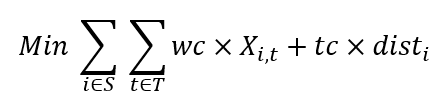

In [63]:
#objective function
obj = quicksum((woc*X[(i,t)])+(dist[(i)]*tc) for i in stationID for t in time)

In [64]:
model.setObjective(obj, GRB.MINIMIZE)


In [65]:
model.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 84240 rows, 42120 columns and 180765 nonzeros
Model fingerprint: 0xabb72a67
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 8e+01]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve removed 56851 rows and 1325 columns
Presolve time: 0.19s
Presolved: 27389 rows, 54198 columns, 107224 nonzeros

Ordering time: 0.02s

Barrier statistics:
 AA' NZ     : 3.398e+04
 Factor NZ  : 2.681e+05 (roughly 30 MB of memory)
 Factor Ops : 4.066e+06 (less than 1 second per iteration)
 Threads    : 6

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.27665449e+06 -1.18737417e+06  1.39e+02 7.11e-15  4.40e+0

### 5.1 Results

We obtained the following optimal values:

In [66]:
bikes_moved = []
keys = []
costs = []
for key in X:
    k = key
    x = X[key].X
    c = X[key].X*woc
    bikes_moved.append(x)
    keys.append(k)
    costs.append(c)

#Table containing stations and number of bikes were moved from station (i) at time (t)
results = Table().with_columns('station at time t', keys, 'bikes moved from station i', bikes_moved, 'costs', costs).sort('bikes moved from station i', descending = True)
results

station at time t | bikes moved from station i | costs
[268 14]          | 43                         | 56.4375
[35 1]            | 31.3938                    | 41.2044
[35 13]           | 30                         | 39.375
[90 2]            | 26.3938                    | 34.6419
[268 13]          | 25                         | 32.8125
[114 18]          | 23                         | 30.1875
[177 11]          | 23                         | 30.1875
[268 2]           | 21.9012                    | 28.7454
[90 14]           | 21                         | 27.5625
[268 10]          | 18                         | 23.625
... (14030 rows omitted)

# 6. Model Analysis and Managerial Insights

From the linear program, we found that the objective value, our optimal minimized cost, is equal to \$6129.87. Now let's dive into our sensitivity analysis to examine how costs are affected by the changes in different input variables.


In [67]:
# Find objective value
model.objVal

6129.870081792678

In this section of the project, we will be answering the two following questions.

1. What will happen to the objective function and bike repositioning scheme if the docking station capacity scales up?
2. What will happen to the objective function if we assume that trucks do get stuck in traffic?

### 6.1 Station Capacity Change

To determine changes in costs from the increase of each station capacity, we run the shadow price of each constraint.

In [68]:
for key in C:
    print('shadow price of constraint ', key, ' is ', C[key].Pi)

shadow price of constraint  0  is  0.0
shadow price of constraint  1  is  0.0
shadow price of constraint  2  is  0.0
shadow price of constraint  3  is  0.0
shadow price of constraint  5  is  0.0
shadow price of constraint  6  is  0.0
shadow price of constraint  7  is  0.0


We see that the shadow price for each constraint has a value of 0, meaning that a change on the right-hand side of the equation does not impact the objective value. We recall that one of our previously set-up constraints prevents the number of bikes available at each period from exceeding station capacity. Hence, if we increase the docking space, our optimal cost will stay the same, which is \$6129.87.

### 6.2 Distance Increase Between Stations 

To implement this sensitivity analysis, we made another assumption:

Trucks do not travel the same exact routes as bikes and instead take the roads, where they can be stuck in traffic. They therefore find other ways to go around this traffic, doubling the distance they have to travel between bike stations at peak hours, which are 8AM-9AM and 4PM-5PM.



In [69]:
#Doubling distance to account for traffic in peak hours 8-9AM and 4-5PM
new_distance = []
peak_hour = [4,5,8,9]

for i in range(len(july8.column('start_hour'))):
    if july8.column('start_hour')[i] in peak_hour:
        x = july8.column('distances in km')[i] * 2 
        new_distance.append(x)
    else:
        y = july8.column('distances in km')[i]
        new_distance.append(y)
        
july8_new = july8.with_columns('new distances',new_distance)
july8_new

trip_id  | start_time        | end_time          | bikeid | tripduration | from_station_id | from_station_name             | to_station_id | to_station_name          | usertype   | gender | birthyear | end_hour | start_date | age  | latitude origin | longitude origin | latitude destination | longitude destination | distances in km | start_hour | new distances
15033784 | 7/8/2017 23:59:22 | 7/9/2017 00:14:48 | 2156   | 926          | 53              | LaSalle (Wells) St & Huron St | 61            | Wood St & Milwaukee Ave  | Subscriber | Female | 1986      | 0        | 7/8/2017   | 31   | 41.8949         | -87.6323         | 41.9077              | -87.6726              | 3.62689         | 23         | 3.62689
15033783 | 7/8/2017 23:57:36 | 7/9/2017 00:17:46 | 253    | 1210         | 130             | Damen Ave & Division St       | 124           | Damen Ave & Cullerton St | Subscriber | Male   | 1986      | 0        | 7/8/2017   | 31   | 41.9033         | -87.6784         | 41.855               | -87.6757              | 5.36034         | 23         | 5.36034
15033782 | 7/8/2017 23:57:17 | 7/9/2017 00:07:30 | 3977   | 613          | 35              | Streeter Dr & Grand Ave       | 85            | Michigan Ave & Oak St    | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8923         | -87.612          | 41.901               | -87.6238              | 1.37044         | 23         | 1.37044
15033781 | 7/8/2017 23:57:12 | 7/9/2017 00:07:05 | 1277   | 593          | 35              | Streeter Dr & Grand Ave       | 85            | Michigan Ave & Oak St    | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8923         | -87.612          | 41.901               | -87.6238              | 1.37044         | 23         | 1.37044
15033780 | 7/8/2017 23:57:09 | 7/9/2017 00:07:46 | 3723   | 637          | 35              | Streeter Dr & Grand Ave       | 85            | Michigan Ave & Oak St    | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8923         | -87.612          | 41.901               | -87.6238              | 1.37044         | 23         | 1.37044
15033779 | 7/8/2017 23:57:05 | 7/9/2017 00:04:19 | 3727   | 434          | 338             | Calumet Ave & 18th St         | 273           | Michigan Ave & 18th St   | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8576         | -87.6194         | 41.8578              | -87.6245              | 0.427638        | 23         | 0.427638
15033778 | 7/8/2017 23:57:04 | 7/9/2017 00:07:14 | 2070   | 610          | 35              | Streeter Dr & Grand Ave       | 85            | Michigan Ave & Oak St    | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8923         | -87.612          | 41.901               | -87.6238              | 1.37044         | 23         | 1.37044
15033777 | 7/8/2017 23:57:03 | 7/9/2017 00:10:15 | 3666   | 792          | 177             | Theater on the Lake           | 126           | Clark St & North Ave     | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.9263         | -87.6308         | 41.912               | -87.6319              | 1.59132         | 23         | 1.59132
15033776 | 7/8/2017 23:56:58 | 7/9/2017 00:03:55 | 3278   | 417          | 338             | Calumet Ave & 18th St         | 273           | Michigan Ave & 18th St   | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.8576         | -87.6194         | 41.8578              | -87.6245              | 0.427638        | 23         | 0.427638
15033775 | 7/8/2017 23:56:55 | 7/9/2017 00:10:15 | 3290   | 800          | 177             | Theater on the Lake           | 126           | Clark St & North Ave     | Customer   | nan    | nan       | 0        | 7/8/2017   | nan  | 41.9263         | -87.6308         | 41.912               | -87.6319              | 1.59132         | 23         | 1.59132
... (20924 rows omitted)

Doubling the distances gives new average distances from each station (i) and thus, different costs.

In [70]:
#Calculating the average distance from each station (i)
new_avg_distance = july8_new.group('from_station_id', np.mean).column('new distances mean')
new_d = dict(zip(station_id.column('id'), new_avg_distance))

In [71]:
#merging two dictionaries to account for stations without any trips
new_dist = {}
for i in range(len(stationID)):
    new_dist[(stationID[i])] = 0 

for i in stationID:
    if new_d.get((i),0) != 0:
        new_dist[(i)] = new_d[(i)]
    else: 
        new_dist[(i)] = 0

In [72]:
#objective function
obj = quicksum((woc*X[(i,t)])+(new_dist[(i)]*tc) for i in stationID for t in time)
model.setObjective(obj, GRB.MINIMIZE)

In [73]:
model.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 84240 rows, 42120 columns and 180765 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 8e+01]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.5590135e+03   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.01 work units)
Optimal objective  6.559013544e+03


The increases in distances in the model cause the total cost of BIXI to increase by $429.14. Although the initial LP does not account for external factors such as traffic and route pathing, we can expect transportation costs to be higher in practical application. 

# 6. Conclusion

After analyzing Divvy’s datasets for both Q3 and Q4, we were able to come up with a solution to Bixi’s original problem. We were asked to present an optimized solution for Bixi. To effectively accomplish this, we started off with an in-depth analysis and organization of the Divvy dataset. To do this we found basic statistics and examined interesting correlations between some variables in the tables. This included various tables, pie charts, bar graphs and maps. In general, we noticed station 35 (Streeter Dr. and Grand Ave.) was among the most popular, average trips last 15 mins, popular hours are during rush hours (8-9am and 5-6pm), the total station capacity is 10,216 and they have a total of 5737 bikes.  

For our optimization model, since Q3 has more data, we decided to focus on this quarter, more specifically we narrowed it down to July 8th, since this date had the most trips. We also made multiple assumptions for our model to work. These included, assuming no traffic, a direct route, no shortage in workers, good weather conditions, no breaks and that Bixi trucks travel the same route as bikes. We also used Geopy.distance in order to get the distances in km for each station. With all this, we had the appropriate data to run our optimization problem. 
For our optimization problem, our decision variables were station ID (i) and time (t), with X(i,t) as the number of bikes taken out from a station i at time t, Y(i,t) as the number of bikes put in a station i at time t and Z(i,t) as the number of bikes assumed to be in station i at time t. As for our parameters, our variable costs include wage costs (\\$1.05/bike) and transportation costs (\\$0.19/km). We also included overhead costs of \\$0.26/bike. More parameters are station capacity, a feasible starting inventory at 56% starting capacity, distances for each station and leave/arrivals of customers. Our constraints include; the number of bikes in each station at midnight should be equal to the feasible start inventory, the number of bikes in each time t cannot exceed station capacity, ending inventory of time t must be the same as the starting inventory of the next period and non-negativity constraints. Finally, our objective function to minimize total cost attributed to the wage and overhead cost of each bikes reallocated from each station (i) and every time (t) of the day and the transportation cost for each km travelled to each station (i). Which leaves us with:

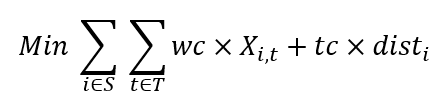

We found a total cost of \\$6,129, which represents the approximate minimum cost for Bixi to reallocate all its bikes to ensure that demand meets supply when necessary. This was our optimal value when running our optimization program. As for our sensitivity analysis, we looked into two different scenarios: What will happen to the objective function and bike repositioning scheme if the docking station capacity scales up? What will happen to the objective function if we assume that trucks do get stuck in traffic? For each of these, respectively, the total minimum cost with capacity changes stayed the same at \\$6,129 and for increased distances assuming there is traffic the minimum costs go up to \\$6,559 (a difference of \\$430).
In summary, the minimum costs Bixi can have to reallocate bikes ensuring it meets demand is of \\$6,129. This cost is sensitive to changes in distances, for instance if there is traffic or detours, but not sensitive to capacity changes.  


### Limitations

While we managed to find a solution to minimize Bixi’s costs, there are a few limitations to our model and the dataset provided.

Firstly, the model was oversimplified and was based on many assumptions. Costs are not exactly accurate as we assumed that trucks would travel the same routes as bikes, which are more flexible in terms of where they can go (e.g., small roads where trucks cannot pass through). Therefore, transportation costs might be underestimated due to underestimating the km needed to travel from one station to the other.

Secondly, the dataset is from 2017, which might not reflect the demand for Bixi’s bikes in 2022. For example, during COVID-19, many users were most likely staying at home, decreasing bike usage and demand. Thus, our model does not consider the negative impacts of downturns in the economy and our optimal solution might not be applicable in such situations. 
Lastly, given that Divvy was founded in 2016 and our dataset is from 2017, this might represent an overestimation of demand, as the bike-sharing system was new. People might have been more keen on using this new system, but today, perhaps individuals are more budget-conscious and have found that getting a bike from a local marketplace is cheaper than subscribing to services like Bixi or Divvy. We would need to reevaluate the demand and could potentially eliminate certain stations (if applicable) to become even more cost-efficient. 

Lastly, given that Divvy was founded in 2016 and our dataset is from 2017, this might represent an overestimation of demand, as the bike-sharing system was new. People might have been more keen on using this new system, but today, perhaps individuals are more budget-conscious and have found that getting a bike from a local marketplace is cheaper than subscribing to services like Bixi or Divvy. We would need to reevaluate the demand and could potentially eliminate certain stations (if applicable) to become even more cost-efficient. 